In [1]:
import os
import anodet
import torch
from torch.utils.data import DataLoader


In [2]:
class_name = 'bottle'
DATASET_PATH = os.path.realpath("../../data/mvtec_dataset/")
test_dataset = anodet.MVTecDataset(DATASET_PATH, class_name, is_train=False)
test_dataloader = DataLoader(test_dataset, batch_size=32)
print("Number of images in dataset:", len(test_dataloader.dataset))

Number of images in dataset: 83


In [3]:
distributions_path = './distributions/'
embedding_coreset = torch.load(distributions_path+'bottle_embedding_coreset.pt')

In [4]:
model = anodet.PatchCore('resnet18', embedding_coreset=embedding_coreset)

In [11]:
res = model.evaluate(test_dataloader)
images, image_classifications_target, masks_target, image_scores, score_maps = res

Inference: 100%|██████████| 3/3 [00:10<00:00,  3.46s/it]


Image level
ROC-AUC score: 0.9984126984126984

Optimal thresh: 1.9476951
Recall: 0.9841269841269841
Precision: 1.0


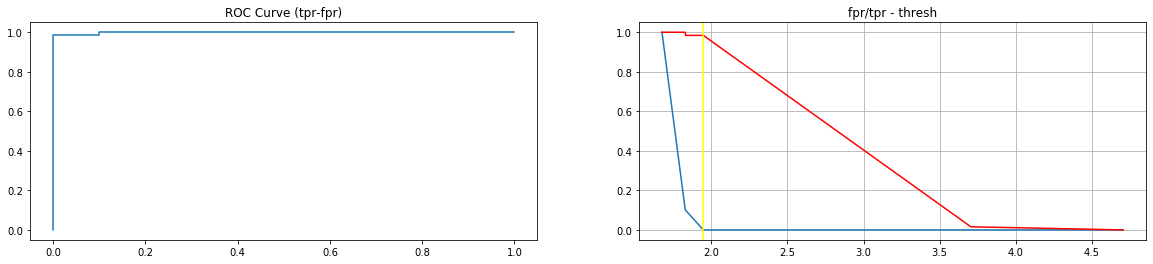

Pixel level
ROC-AUC score: 0.9780800599946581

Optimal thresh: 2.2580578
Recall: 0.8003093944643721
Precision: 0.5701883010367353


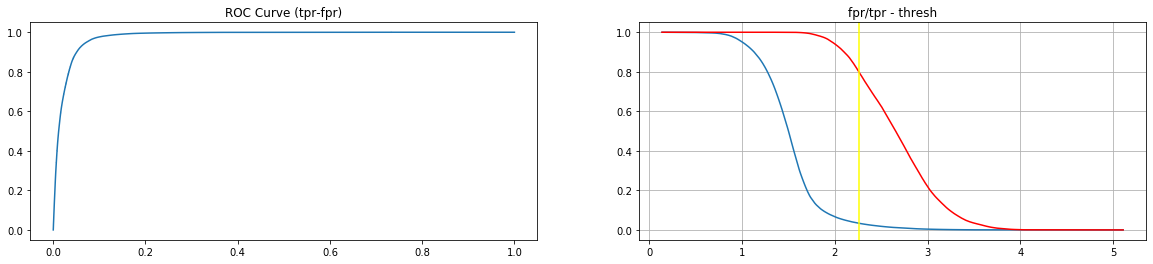

In [6]:
anodet.visualize_eval_data(image_classifications_target, masks_target, image_scores, score_maps)

In [7]:
distributions_path = './distributions/'
mean = torch.load(distributions_path+'bottle_mean.pt')
cov_inv = torch.load(distributions_path+'bottle_cov_inv.pt')

In [8]:
model = anodet.Padim(backbone='resnet18', mean=mean, cov_inv=cov_inv, device=torch.device('cpu'))

In [9]:
res = model.evaluate(test_dataloader)
images, image_classifications_target, masks_target, image_scores, score_maps = res

Inference: 100%|██████████| 3/3 [00:10<00:00,  3.64s/it]


Image level
ROC-AUC score: 0.996031746031746

Optimal thresh: 16.869349
Recall: 1.0
Precision: 0.984375


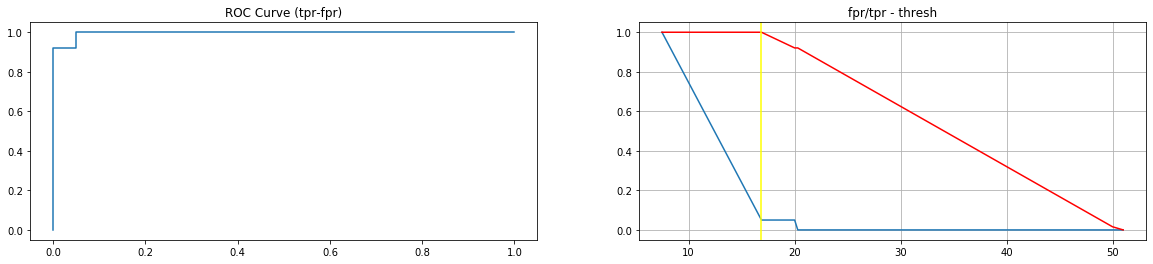

Pixel level
ROC-AUC score: 0.9840468286438052

Optimal thresh: 14.131464
Recall: 0.8013904657653216
Precision: 0.6387621997166169


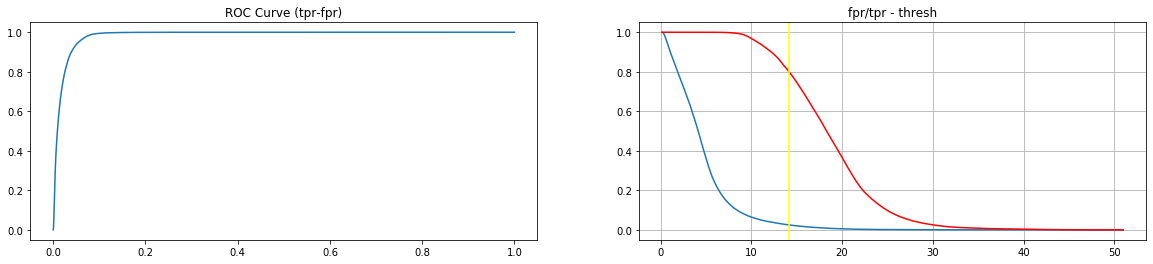

In [10]:
anodet.visualize_eval_data(image_classifications_target, masks_target, image_scores, score_maps)